# IMPORTING THE LIBRARIES

In [1]:
import os.path  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
import tensorflow as tf  
import imageio as iio  
import warnings  
from pathlib import Path  
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import load_model 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.metrics import classification_report 

warnings.filterwarnings('ignore') 

# IMPORTING THE DATASET

In [2]:
image_dir = Path(r"C:\Users\tanuj\OneDrive\Desktop\Fish") 
classes = [i for i in os.listdir(image_dir) if '.' not in i]
classes

['Arowana',
 'Black Sea Sprat',
 'Blue Tang',
 'Butterfly Fish',
 'Chital Fish',
 'Clown Fish',
 'Discus Fish',
 'Fish',
 'Four Finger ThreadFin',
 'Freshwater Eel',
 'Gilt-Head Bream',
 'Glass Perchlet',
 'Goby',
 'GoldFish',
 'Grass Carp',
 'Green Spotted Puffer',
 'Hourse Mackerel',
 'Janitor Fish',
 'Moon Fish',
 'Mosquito Fish',
 'Needle Fish',
 'No Fish',
 'Perch',
 'Red Mullet',
 'Sea Bass',
 'Shark',
 'Star Fish',
 'Sword Fish',
 'Tilapia',
 'Trout']

# CREATE A DATAFRAME

In [3]:

filepaths = list(image_dir.glob('**/*.jp*g')) 
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})
print(filepaths.head())
print(labels.head())



0    C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\1...
1    C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...
2    C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...
3    C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...
4    C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...
Name: Filepath, dtype: object
0    Arowana
1    Arowana
2    Arowana
3    Arowana
4    Arowana
Name: Label, dtype: object


# EXPLORATORY DATA ANALYSIS

In [4]:
df.head()

Filepath    Label
0  C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\1...  Arowana
1  C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
2  C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
3  C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
4  C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana

In [5]:
df.tail()

Filepath  Label
30995  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...  Trout
30996  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...  Trout
30997  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...  Trout
30998  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...  Trout
30999  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...  Trout

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31000 entries, 0 to 30999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  31000 non-null  object
 1   Label     31000 non-null  object
dtypes: object(2)
memory usage: 484.5+ KB


In [7]:
print(df.shape)

(31000, 2)


In [8]:
df['Filepath'][0]

'C:\\Users\\tanuj\\OneDrive\\Desktop\\Fish\\Arowana\\1.jpeg'

In [9]:
df['Label'][0]

'Arowana'

In [10]:
image_df = pd.concat([filepaths, labels], axis=1)
image_df

Filepath    Label
0      C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\1...  Arowana
1      C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
2      C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
3      C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
4      C:\Users\tanuj\OneDrive\Desktop\Fish\Arowana\A...  Arowana
...                                                  ...      ...
30995  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...    Trout
30996  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...    Trout
30997  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...    Trout
30998  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...    Trout
30999  C:\Users\tanuj\OneDrive\Desktop\Fish\Trout\Tro...    Trout

[31000 rows x 2 columns]

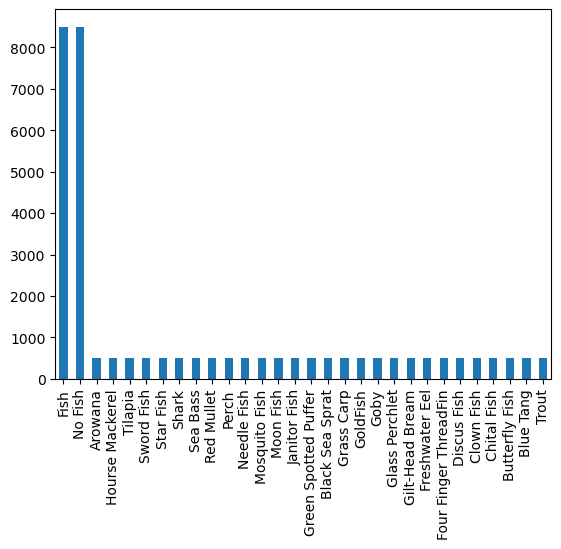

In [11]:
# Plotting the bar chart of label counts
df['Label'].value_counts().plot.bar()
plt.show()


In [12]:
#Checking the value counts of each of the datasets
df['Label'].value_counts()

Fish                     8500
No Fish                  8500
Arowana                   500
Hourse Mackerel           500
Tilapia                   500
Sword Fish                500
Star Fish                 500
Shark                     500
Sea Bass                  500
Red Mullet                500
Perch                     500
Needle Fish               500
Mosquito Fish             500
Moon Fish                 500
Janitor Fish              500
Green Spotted Puffer      500
Black Sea Sprat           500
Grass Carp                500
GoldFish                  500
Goby                      500
Glass Perchlet            500
Gilt-Head Bream           500
Freshwater Eel            500
Four Finger ThreadFin     500
Discus Fish               500
Clown Fish                500
Chital Fish               500
Butterfly Fish            500
Blue Tang                 500
Trout                     500
Name: Label, dtype: int64

# IMAGE PREPROCESSING

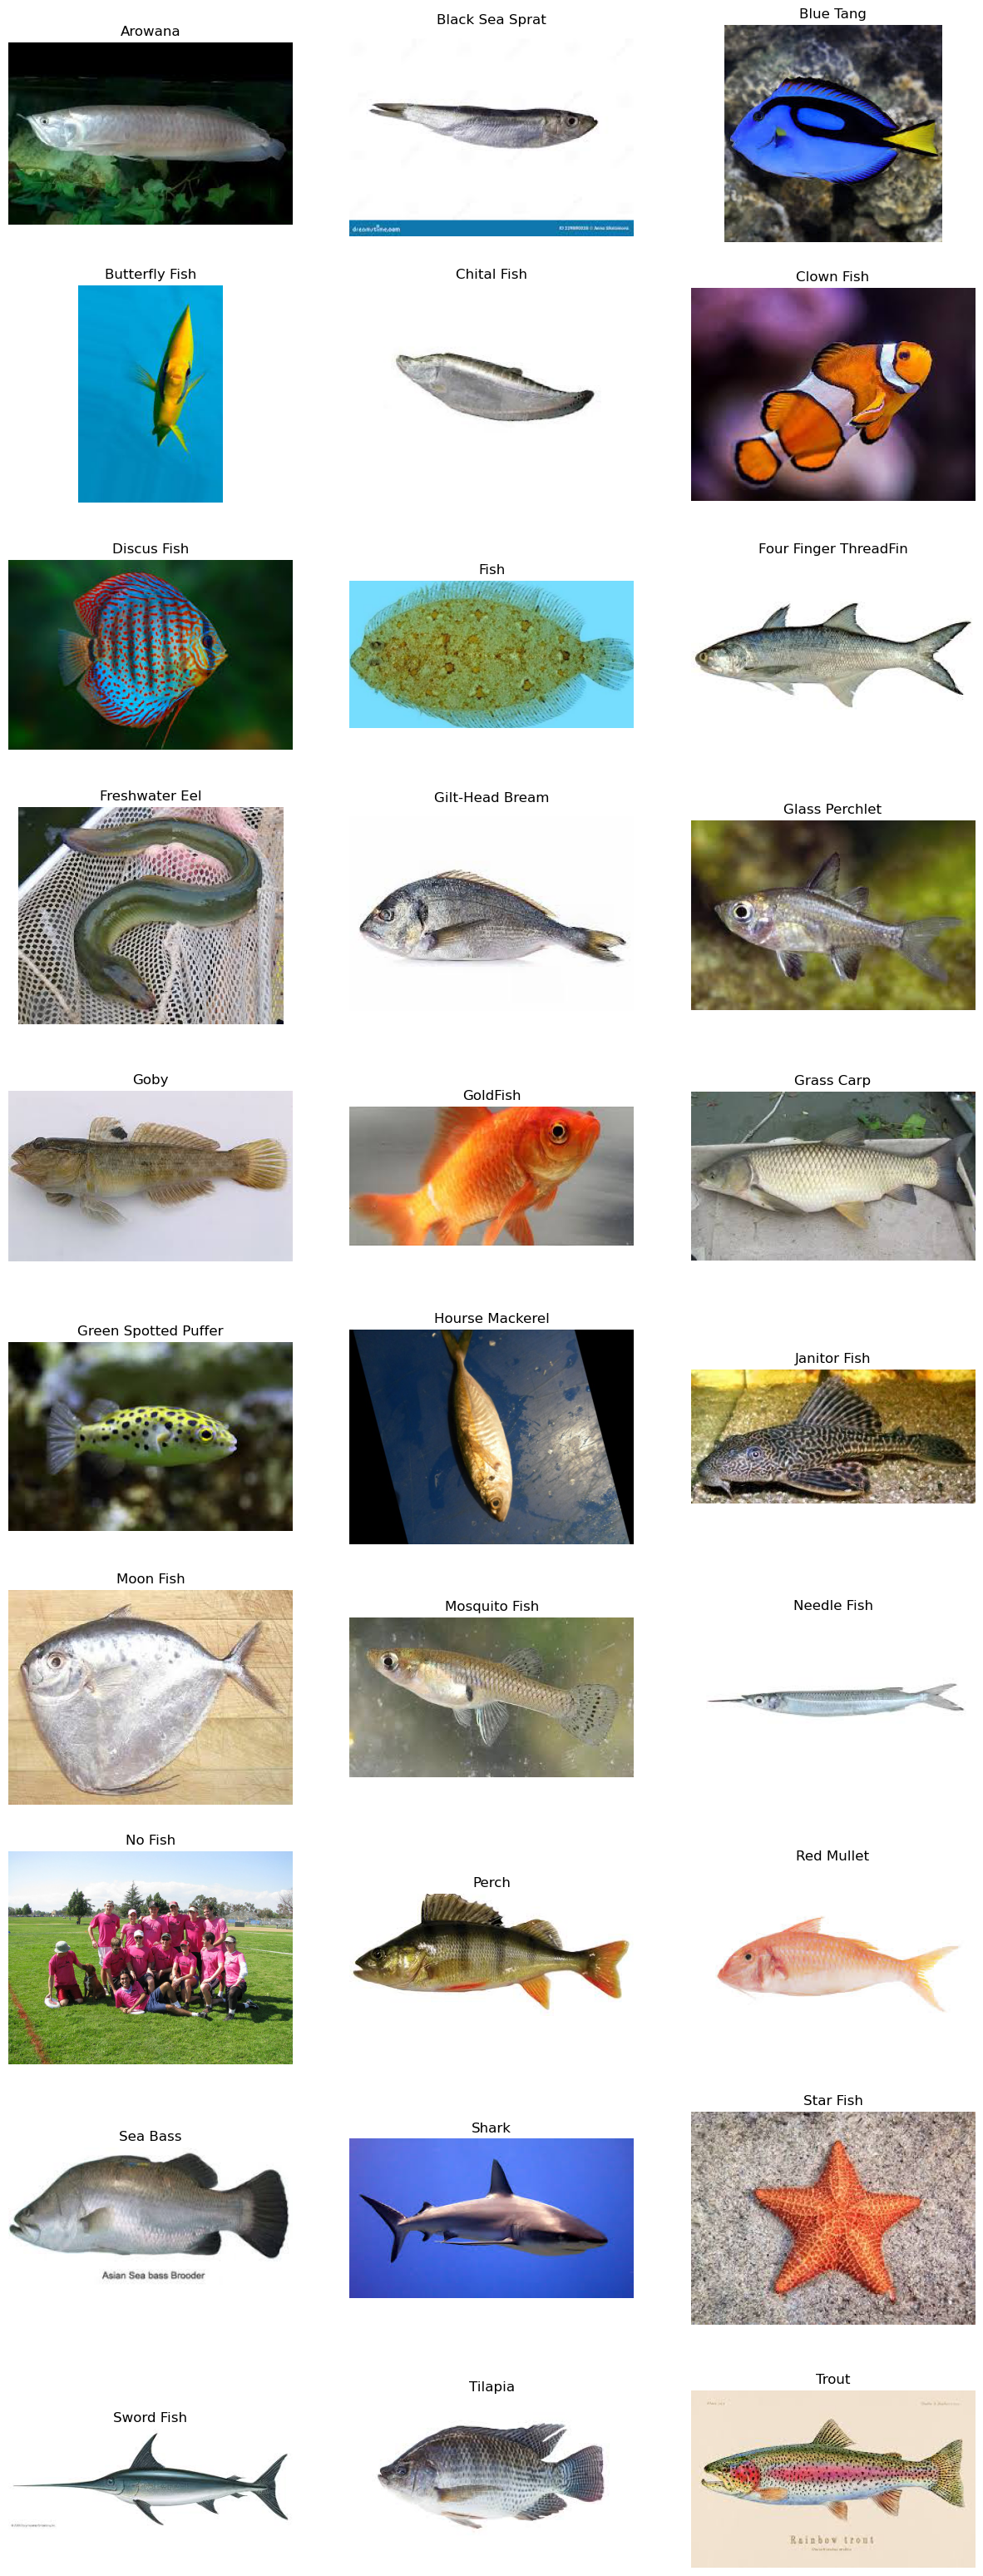

In [13]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


num_labels = df['Label'].nunique()


rows = math.ceil(num_labels / 3)
cols = min(num_labels, 3)


idx = 0
plt.figure(figsize=(15, 4 * rows))
for unique_label in df['Label'].unique():

    img_path = df[df['Label']==unique_label].iloc[0, 0]
    try:

        img = mpimg.imread(img_path)
        plt.subplot(rows, cols, idx+1)
        plt.imshow(img)
        plt.title(unique_label)
        plt.axis('off')
    except Exception as e:
        print(f"Error reading image {img_path}: {e}")
    idx += 1

plt.show()

# DATA AUGMENTATION

In [14]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# img = load_img(r"")  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# #
# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir=r'C:\Users\tanuj\OneDrive\Desktop\Fish\Green Spotted Puffer', save_prefix='Butterfly Fish', save_format='jpeg'):
#     i += 1
#     if i >1:
#         break  #

# TRAIN_TEST_SPLIT

In [15]:
train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)

# DATA SPLITTING FOR VALIDATION

In [16]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

 # DATA LOADING FOR TRAIN,TEST AND VALIDATION IMAGES

In [17]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 17360 validated image filenames belonging to 30 classes.
Found 9300 validated image filenames belonging to 30 classes.
Found 4340 validated image filenames belonging to 30 classes.


In [18]:
#Checking the shape of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(21700, 2)
(9300, 2)


# PLOTTING OF IMAGES AFTER PREPROCESSING

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


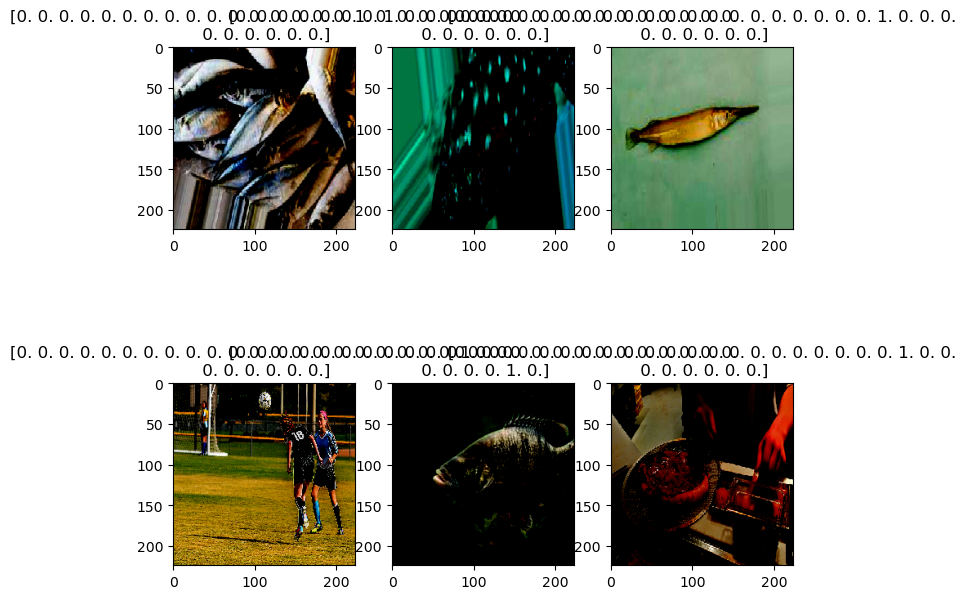

In [19]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(8,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, Label = test_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(Label[0])
    j=j+1

# MODEL TRAINING--MOBILE-NETV2

In [20]:
model = tf.keras.applications.MobileNetV2( input_shape=(224, 224, 3),include_top=False,weights='imagenet', pooling='avg')
model.trainable = False

In [21]:
inputs =model.input

x = tf.keras.layers.Dense(128, activation='relu')(model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(30, activation='softmax')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [22]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


543/543 [==============================] - 624s 1s/step - loss: 0.4512 - accuracy: 0.8787 - val_loss: 0.1458 - val_accuracy: 0.9546
Epoch 2/5
543/543 [==============================] - 2176s 4s/step - loss: 0.0961 - accuracy: 0.9727 - val_loss: 0.0801 - val_accuracy: 0.9737
Epoch 3/5
543/543 [==============================] - 893s 2s/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.1209 - val_accuracy: 0.9643
Epoch 4/5
543/543 [==============================] - 555s 1s/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.0914 - val_accuracy: 0.9735
Epoch 5/5
543/543 [==============================] - 458s 844ms/step - loss: 0.0284 - accuracy: 0.9916 - val_loss: 0.1386 - val_accuracy: 0.9590


# SAVE THE MODEL

In [23]:
model.save('fishModel10.h5')
print('Saved')

savedModel = load_model("fishModel10.h5")
savedModel.summary()

Saved
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']  

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# MODEL PERFORMANCE EVALUATION

In [24]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.08403
Test Accuracy: 97.59%


In [26]:
predictions = savedModel.predict(test_images)

291/291 [==============================] - 277s 943ms/step


In [27]:

predictions_array = np.array(predictions)


test_labels_array = np.array(test_images.labels)

predicted_labels = np.argmax(predictions_array, axis=1)

accuracy = accuracy_score(test_labels_array, predicted_labels)


precision = precision_score(test_labels_array, predicted_labels, average='weighted')
recall = recall_score(test_labels_array, predicted_labels, average='weighted')
f1 = f1_score(test_labels_array, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


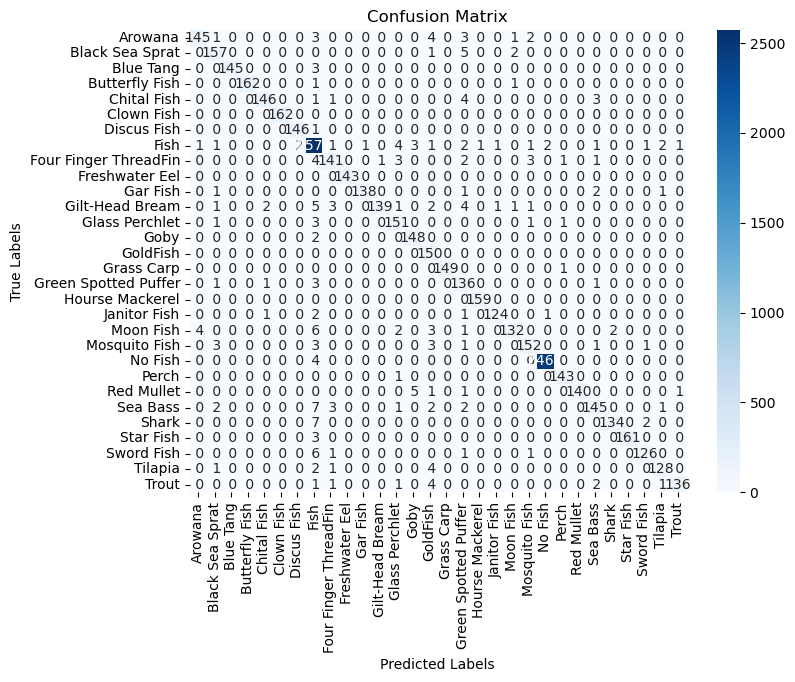

In [28]:

conf_matrix = confusion_matrix(test_images.labels, predictions.argmax(axis=1))

class_names = ['Arowana','Black Sea Sprat','Blue Tang','Butterfly Fish','Chital Fish','Clown Fish','Discus Fish','Fish','Four Finger ThreadFin','Freshwater Eel','Gar Fish','Gilt-Head Bream','Glass Perchlet','Goby','GoldFish','Grass Carp', 'Green Spotted Puffer','Hourse Mackerel','Janitor Fish','Moon Fish','Mosquito Fish','No Fish','Perch','Red Mullet','Sea Bass','Shark','Star Fish','Sword Fish','Tilapia','Trout']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='2d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# FISH CLASSIFICATION

In [29]:
classification = ['Fish Detected, Common Name: Arowana, Scientific name: Osteoglossinae , Class: Actinopterygii, Domain: Eukaryota, Family: Osteoglossidae, Kingdom: Animalia, Order: Osteoglossiformes',
 'Fish Detected, Common Name: Black Sea Sprat, Scientific name: Clupeonella cultriventris,Family: Ehiravidae, Higher classification: Clupeonella',
 'Fish Detected, Common Name: Blue Tang, Scientific Name: Paracanthurus hepatus,Lifespan: 8 – 20 years, Class: Actinopterygi,Domain: Eukaryota,Family: Acanthuridae,Genus: Paracanthurus; Bleeker, 1863,Kingdom: Animalia ',
 'Fish Detected, Common Name: Butterfly Fish, Scientific Name: Chaetodontidae,Class: Actinopterygii,Order: Perciformes,Domain: Eukaryota,Kingdom: Animalia,Phylum: Chordata',
 'Fish Detected, Common Name: Chital Fish, Scientific Name: Chitala chitala,Class: Actinopterygii,Order: Osteoglossiformes,Conservation status: Near Threatened (Population decreasing) Encyclopedia of Life,Family: Notopteridae,Kingdom: Animalia',
 'Fish Detected, Common Name: Clown Fish, Scientific Name: mphiprioninae,Clade: Percomorpha,Class: Actinopterygii,Domain: Eukaryota,Family: Pomacentridae,Kingdom: Animalia',
 'Fish Detected, Common Name: Discus Fish, Scientific Name: Symphysodon,Class: Actinopterygii,Domain: Eukaryota,Family: Cichlidae,Genus: Symphysodon; Heckel, 1840,Kingdom: Animalia',
 'Fish Detected, Fish Detected but unable to recognize fish species or model not been trained for this  particular species',
 'Fish Detected, Common Name: Four Finger ThreadFin, Scientific Name: Eleutheronema tetradactylum,Family: Polynemidae,Genus: Eleutheronema,Kingdom: Animalia,Order: Perciformes',
 'Fish Detected, Common Name: Freshwater Eel, Scientific Name: Anguillidae,Class: Actinopterygii,Family: Anguillidae; Rafinesque, 1810,Genus: Anguilla; Garsault, 1764,Kingdom: Animalia,Order: Anguilliformes',
 'Fish Detected, Common Name: Gilt-Head Bream, Scientific Name: Sparus aurata,Mass: 9.5 kg ,Class: Actinopterygii,Family: Sparidae,Genus: Sparus,Kingdom: Animalia,Order: Spariformes',
 'Fish Detected, Common Name: Glass Perchlet, Scientific Name: Chanda nama,Genus: Chanda; F. Hamilton, 1822,Family: Ambassidae,Kingdom: Animalia',
 'Fish Detected, Common Name: Goby, Scientific Name: Gobiidae,Class: Actinopterygii,Family: Gobiidae; G. Cuvier, 1816,Kingdom: Animalia,Order: Gobiiformes,Phylum: Chordata',
 'Fish Detected, Common Name: GoldFish, Scientific Name: Carassius auratus,Class: Actinopterygii,Domain: Eukaryota,Family: Cyprinidae,Genus: Carassius,Kingdom: Animalia',
 'Fish Detected, Common Name: Grass Carp, Scientific Name: Ctenopharyngodon idella,Mass: 25 kg (Adult) ,Class: Actinopterygii,Genus: Ctenopharyngodon; Steindachner, 1866,Domain: Eukaryota,Family: Cyprinidae,Kingdom: Animalia',
 'Fish Detected, Common Name: Green Spotted Puffer, Scientific Name: Dichotomyctere nigroviridis,Class: Actinopterygii,Domain: Eukaryota,Family: Tetraodontidae,Genus: Dichotomyctere,Kingdom: Animalia,Order: Tetraodontiformes',
 'Fish Detected, Common Name: Hourse Mackerel, Scientific Name: Trachurus trachurus, Class: Actinopterygii, Family: Carangidae',
 'Fish Detected, Common Name: Janitor Fish, Scientific Name: Pterygoplichthys, Family: Loricariidae, Class: Actinopterygii ,Domain: Eukaryota ,Genus: Pterygoplichthys; T. N. Gill, 1858 ,Order: Siluriformes',
 'Fish Detected, Common Name: Moon Fish, Scientific Name: Lampris ,Family: Lampridae; Class: Actinopterygii ,Domain: Eukaryota ,Genus: Lampris; Retzius, 1799 ,Kingdom: Animalia ,Order: Lampriformes',
 'Fish Detected, Common Name: Mosquito Fish, Scientific Name:Gambusia affinis, Class: Actinopterygii, Domain: Eukaryota , Family: Poeciliidae, Genus: Gambusia, Kingdom: Animalia',
 'Fish Detected, Common Name: Needle Fish, Scientific Name: Lepisosteidae,Clade: Ginglymodi,Class: Actinopterygii,Domain: Eukaryota,Family: Lepisosteidae; G. Cuvier, 1825,Kingdom: Animalia',                 
 'No Fish detected in an image',
 'Fish Detected, Common Name: Perch, Scientific name: Perca',
 'Fish Detected, Common Name: Red Mullet, Scientific Name: Mullus surmuletus , Mass: 550 g (Adult) ,Family: Mullidae ,Class: Actinopterygii ,Genus: Mullus ,Domain: Eukaryota ,Kingdom: Animalia',
 'Fish Detected, Common Name: Sea Bass, Scientific Name: Dicentrarchus labrax , Class: Actinopterygii ,Domain: Eukaryota ,Family: Moronidae ,Genus: Dicentrarchus ,Kingdom: Animalia ,Order: Moroniformes',
 'Fish Detected, Common Name: Shark, Scientific Name: Selachimorpha , Speed: 19 km/h (Maximum, In The Water, Attacking) ,Clade: Neoselachii ,Class: Chondrichthyes ,Domain: Eukaryota ,Kingdom: Animalia',
 'Fish Detected, Common Name: Star Fish, Scientific Name: Asteroidea , Phylum: Echinodermata ,Class: Asteroidea; Blainville, 1830 ,Domain: Eukaryota ,Kingdom: Animalia ,Subphylum: Asterozoa',
 'Fish Detected, Common Name: Sword Fish, Scientific Name: Xiphias gladius',
 'Fish Detected, Common Name: Tilapia, Scientific Name: Oreochromis niloticus , Mass: 2.4 kg (Adult) Encyclopedia of Life ,Class: Actinopterygii ,Domain: Eukaryota ,Family: Cichlidae ,Genus: Oreochromis ,Kingdom: Animalia',
 'Fish Detected, Common Name: Trout, Scientific Name: Oncorhynchus mykiss']

# IMAGE UPLOAD AND PROCESSING

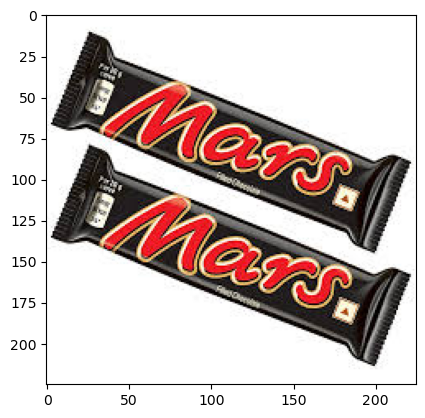

In [106]:
img = iio.imread(r"C:\Users\tanuj\Downloads\images.jpg")
img2 = plt.imshow(img)

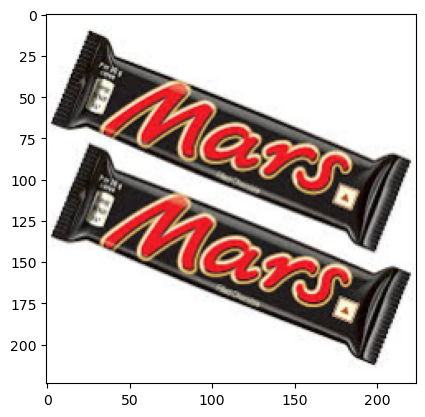

In [107]:
from skimage.transform import resize
resized_image = resize(img, (224,224,3));
img = plt.imshow(resized_image)

# FINAL PREDICTION

In [108]:
pred = savedModel.predict(np.array([resized_image]))
arr = pred[0]
x = np.where(arr == arr.max())
classification[x[0][0]], arr.max()

1/1 [==============================] - 0s 122ms/step


('No Fish detected in an image', 0.6055987)